#**Exercícios - Aula 1**

## 1) Dado o dataset de produtos [1]:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [4]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

In [5]:
# Execute uma vez se ainda não tiver essas libs
%pip install wordcloud unidecode


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1️⃣ Importação de Bibliotecas e Configuração do Ambiente

Importamos as bibliotecas essenciais para análise de dados, visualizações e processamento de texto. Também configuramos o estilo padrão para gráficos.


In [6]:
# Execute esta célula para instalar todas as dependências necessárias
%pip install seaborn wordcloud unidecode


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Bibliotecas de análise e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de NLP e manipulação de texto
from collections import Counter
from wordcloud import WordCloud
import unidecode
import re

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## 2️⃣ Carregamento do Dataset de Produtos

Nesta etapa, carregamos o arquivo CSV diretamente da URL disponibilizada e armazenamos os dados em um DataFrame `df`. Em seguida, visualizamos as primeiras linhas para ter uma noção da estrutura da base.


## 🛠️ Correção do Carregamento: Delimitador Semicolon

O arquivo CSV parece estar usando ponto e vírgula (`;`) como separador. Vamos indicar isso explicitamente ao `read_csv` para corrigir o erro de parsing.


In [8]:
# URL do dataset
url = "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv"

# Forçando o separador como ponto e vírgula
df = pd.read_csv(url, sep=';')

# Visualização inicial
df.head()


,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


## 3️⃣ Estrutura e Informações do Dataset

Vamos examinar a estrutura do DataFrame carregado: colunas, tipos de dados, quantidade de registros e se há duplicatas aparentes. Isso ajuda a orientar as transformações futuras.


In [9]:
# Dimensão do dataset
print(f"🔢 Formato: {df.shape[0]} linhas x {df.shape[1]} colunas")

# Tipos de dados e contagem de não nulos
print("\n🔍 Info:")
df.info()

# Visualizar nomes de colunas
print("\n📑 Colunas disponíveis:")
print(df.columns.tolist())


🔢 Formato: 4080 linhas x 3 colunas

🔍 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB

📑 Colunas disponíveis:
['nome', 'descricao', 'categoria']


## 4️⃣ Análise de Valores Nulos

Verificamos agora a quantidade e o percentual de valores ausentes em cada coluna. Isso orienta decisões sobre limpeza dos dados e eliminação de registros.


In [10]:
# Contagem absoluta e percentual de nulos
null_counts = df.isnull().sum()
null_percent = df.isnull().mean() * 100

# Exibição
print("🔍 Valores Nulos por Coluna:")
display(pd.DataFrame({
    'Nulos': null_counts,
    '%': null_percent.round(2)
}).sort_values(by='%', ascending=False))


🔍 Valores Nulos por Coluna:


,Nulos,%
descricao,1164,28.53
nome,0,0.00
categoria,0,0.00


#### 1.1. Analise o % de valores nulos no dataset

1164 nulos na coluna descrição (28,53%)

## 5️⃣ Remoção de Registros com Valores Nulos

Removemos todas as linhas que contêm valores ausentes em qualquer coluna. Essa decisão é válida neste caso por se tratar de uma base textual e com foco em NLP.


In [11]:
# Remoção de registros com valores nulos
df_clean = df.dropna().reset_index(drop=True)

# Verificando o novo tamanho do dataset
print(f"✅ Linhas restantes após remoção: {df_clean.shape[0]} de {df.shape[0]} originais")


✅ Linhas restantes após remoção: 2916 de 4080 originais


## 6️⃣ Distribuição das Categorias

Nesta etapa, analisamos a distribuição da coluna `categoria`, que representa a classificação dos produtos. Vamos visualizar as categorias mais frequentes em forma tabular e gráfica.


📊 Frequência por categoria:


categoria
livro        838
maquiagem    788
brinquedo    668
game         622
Name: count, dtype: int64

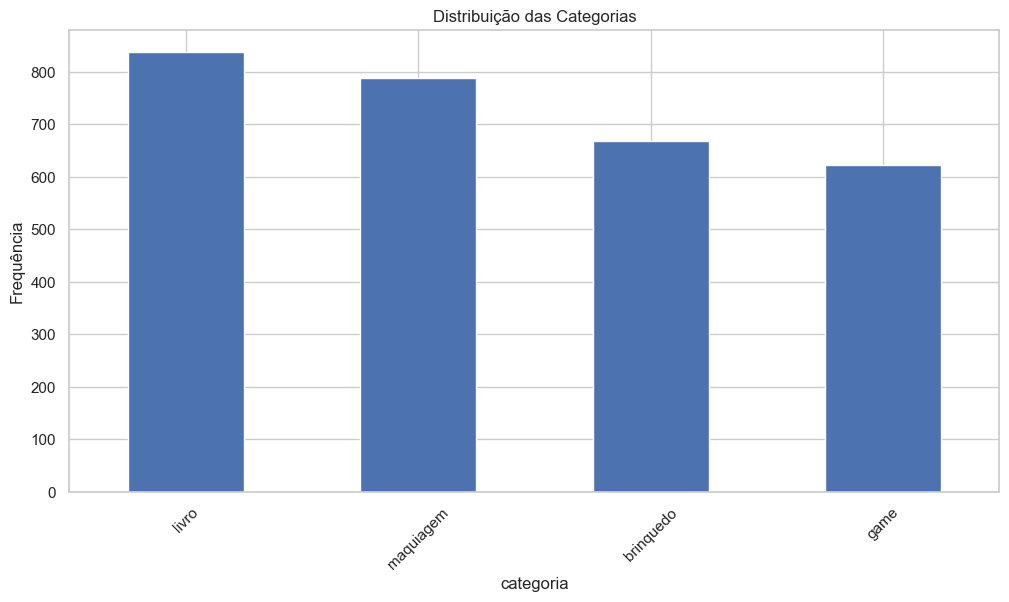

In [12]:
# Contagem de categorias
categoria_counts = df_clean['categoria'].value_counts()

# Tabela
print("📊 Frequência por categoria:")
display(categoria_counts)

# Gráfico
categoria_counts.plot(kind='bar', title='Distribuição das Categorias')
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()


## 7️⃣ Criação da Coluna `texto` para NLP

Combinamos as colunas `nome` e `descricao` para formar uma nova coluna `texto`, que será usada para tokenização, contagem de palavras e geração da nuvem de palavras.


In [13]:
# Criação da coluna "texto"
df_clean['texto'] = df_clean['nome'].astype(str) + " " + df_clean['descricao'].astype(str)

# Exibição de amostras
df_clean[['nome', 'descricao', 'texto']].head()


,nome,descricao,texto
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,Livro Origem - Dan Brown Produto NovoDe Onde...


## 8️⃣ Tokenização e Contagem de Palavras

Nesta etapa, unificamos todos os textos da coluna `texto`, removemos acentuação, colocamos tudo em minúsculas e extraímos palavras com 3 ou mais letras para contar a frequência de ocorrência.


In [14]:
# Juntando todos os textos
todos_textos = " ".join(df_clean['texto'].values)

# Normalização: lowercase + remover acentos
todos_textos = unidecode.unidecode(todos_textos.lower())

# Tokenização: somente palavras com 3 ou mais letras
tokens = re.findall(r'\b[a-z]{3,}\b', todos_textos)

# Contagem
contador = Counter(tokens)
print(f"🔢 Total de palavras únicas (com 3+ letras): {len(contador)}")


🔢 Total de palavras únicas (com 3+ letras): 28653


## 9️⃣ Top 10 Palavras Mais Frequentes

Exibimos aqui as 10 palavras que mais ocorrem na coluna `texto`, já tratadas (minúsculas, sem acento e com no mínimo 3 letras).


In [15]:
# Top 10 palavras mais frequentes
top_10 = contador.most_common(10)

# Impressão formatada
print("🔟 Palavras mais frequentes:")
for palavra, freq in top_10:
    print(f"{palavra}: {freq}")


🔟 Palavras mais frequentes:
para: 8222
que: 6923
com: 6621
nao: 4118
produto: 3380
uma: 3300
mais: 2943
por: 2421
dos: 2075
sua: 1932


## 🔟 Nuvem de Palavras (Word Cloud)

Geramos uma nuvem de palavras com os tokens extraídos do campo `texto`, onde o tamanho de cada palavra representa sua frequência relativa. Essa visualização ajuda a identificar rapidamente os termos dominantes na base.


C:\Users\wilso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wilso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


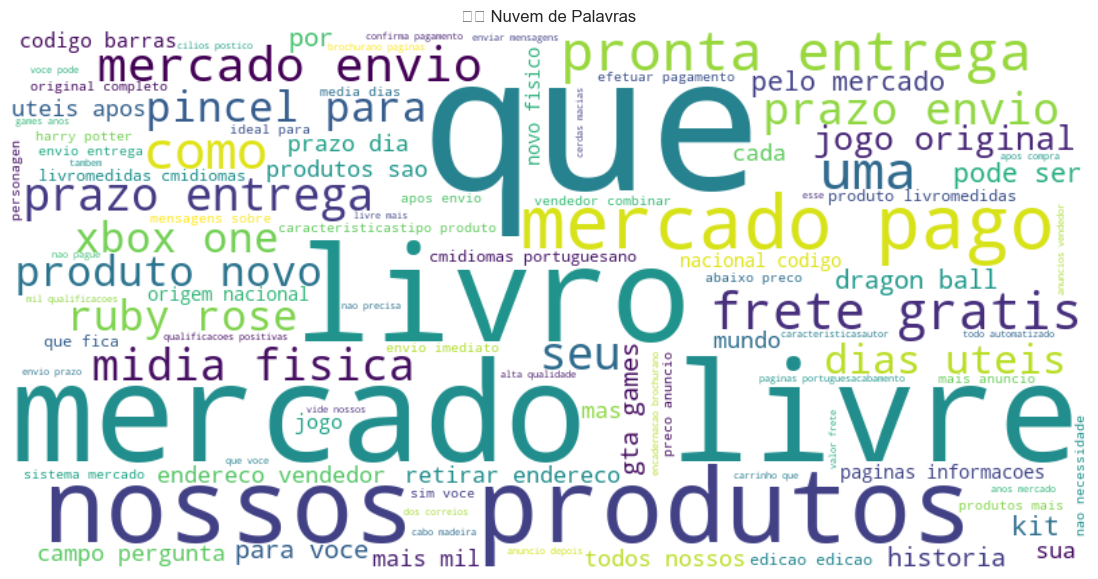

In [16]:
# Gerando a nuvem de palavras
wordcloud = WordCloud(
    background_color='white',
    max_words=100,
    width=800,
    height=400
).generate(" ".join(tokens))

# Exibindo a nuvem
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Nuvem de Palavras")
plt.show()


# ADEQUANDO TOP 10 E NUVEM DE PALAVRAS


## 🔁 Aplicação de Stopwords (NLTK)

Nesta etapa, instalamos o pacote `nltk`, baixamos a lista de stopwords em português e removemos essas palavras dos nossos `tokens`. Em seguida, recalculamos a contagem e as palavras mais frequentes.


In [17]:
# Instalar o nltk (se necessário) e baixar as stopwords
%pip install nltk

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Lista de stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

# Filtrando os tokens
tokens_filtrados = [t for t in tokens if t not in stopwords_pt]

# Recontagem com tokens filtrados
contador_filtrado = Counter(tokens_filtrados)

# Exibir Top 10 palavras filtradas
top_10_filtrado = contador_filtrado.most_common(10)
print("🔟 Top 10 Palavras (sem stopwords):")
for palavra, freq in top_10_filtrado:
    print(f"{palavra}: {freq}")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
🔟 Top 10 Palavras (sem stopwords):
nao: 4118
produto: 3380
mercado: 1918
voce: 1885
frete: 1645
entrega: 1625
produtos: 1531
pagamento: 1494
envio: 1462
sao: 1409


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wilso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ☁️ Nuvem de Palavras (Sem Stopwords)

Agora que removemos palavras irrelevantes (stopwords), geramos uma nova nuvem de palavras mais representativa do conteúdo real da base.


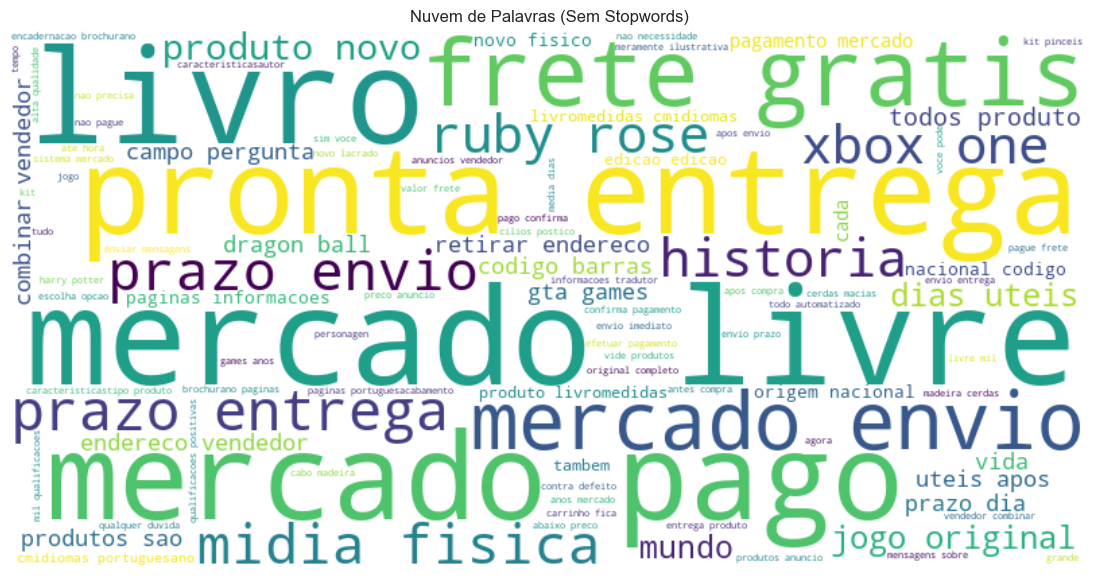

In [18]:
# Nuvem de palavras sem stopwords
wordcloud_filtrada = WordCloud(
    background_color='white',
    max_words=100,
    width=800,
    height=400
).generate(" ".join(tokens_filtrados))

# Exibição da nuvem
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_filtrada, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras (Sem Stopwords)")
plt.show()


"""
---









---
"""


In [26]:
# Verifica se df_clean está definido e mostra suas dimensões
try:
    print("✅ df_clean existe.")
    print(f"Formato: {df_clean.shape[0]} linhas x {df_clean.shape[1]} colunas")
except NameError:
    print("❌ df_clean não está definido no ambiente atual.")


✅ df_clean existe.
Formato: 2916 linhas x 4 colunas


## 2) Utilizando o dataset de produtos [1]:

In [19]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

#### 2.1. Elimine linhas com valores nulos

In [20]:
# resposta

#### 2.2. Adicione uma nova coluna chamada texto, formada pela composição das colunas nome e descrição

In [21]:
# resposta

#### 2.3. Conte quantos Unigramas existem antes e depois de remover stopwords (use a coluna texto)

## 🔤 2.3. (Corrigido) Quantidade de Unigramas com e sem Stopwords

Recontamos agora os unigramas (palavras únicas com 3+ letras) diretamente da coluna `df_clean['texto']`, com e sem a remoção de stopwords, garantindo consistência na origem dos dados.


In [28]:
from nltk.corpus import stopwords
import re
import unidecode

# Reunindo todos os textos
texto_total = " ".join(df_clean['texto'].astype(str))

# Pré-processamento comum: minúsculas e sem acento
texto_normalizado = unidecode.unidecode(texto_total.lower())

# Tokenização simples: apenas palavras com 3 ou mais letras
tokens_gerais = re.findall(r'\b[a-z]{3,}\b', texto_normalizado)

# Versão com e sem stopwords
stopwords_pt = set(stopwords.words('portuguese'))

# Set de unigramas únicos
unigramas_antes = set(tokens_gerais)
unigramas_depois = set([t for t in tokens_gerais if t not in stopwords_pt])

# Contagem
print(f"🔢 Unigramas únicos antes das stopwords: {len(unigramas_antes)}")
print(f"🔻 Unigramas únicos depois das stopwords: {len(unigramas_depois)}")


🔢 Unigramas únicos antes das stopwords: 28653
🔻 Unigramas únicos depois das stopwords: 28527


In [22]:
# resposta

#### 2.4. Conte quantos Bigramas existem antes e depois de remover stopwords (use a coluna texto)

In [23]:
# resposta

#### 2.5. Conte quantos Trigramas existem antes e depois de remover stopwords (use a coluna texto)

In [24]:
# resposta

#### 2.6. Conte quantos unigramas existem na coluna texto após aplicar Stemmer (utilize rslp)

In [25]:
# resposta